# PROYECTO DE MACHINE LEARNING - ANÁLISIS DE SENTIMIENTO


Podemos elegir un tema y sacar de la web opiniones de usuarios y comentarios sobre el mismo.

Casos prácticos:
- estudios de mercado para empresas (cual es la demanda actual?)
- opinión política, sobre todo en el período de las campañas electorales
- análisis de reputación de __una empresa(y sus acciones)__ / una personalidad - periódicos, Youtube, tweets en X, Facebook, Instagram threads...
- un restaurante - reviews de Google y TripAdvisor
- un producto - reviews de Amazon
etc.


Podemos intentar __clasificar__ las opiniones y comentarios en una escala de 1 a 10, siento 1 muy negativo y 10 muy positivo.


Vamos a utilizar de base la libreria __NLTK__ (Natural Language ToolKit) de Python.
Podemos probar distintos algoritmos de ML:


Algoritmos que __entrenamos con nuestro dataset__:

1. Regresión logística 
2. RandomForestClassifier
3. NNs:
    - Fed-Forward NN
    - CNN
    - LSTM

O __modelos pre-entrenados__: 

1. VADER
2. roBERTa


In [ ]:
# %pip install wordcloud
# %pip install nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('vader_lexicon')

# %pip install yfinance -q

# %pip install tqdm

# %pip install transformers
# %pip install torch

In [1]:
# IMPORTACIONES

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import yfinance as yf



C:\Users\Asus\AppData\Local\Temp\ipykernel_21144\832913691.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Cargamos el dataset

En __train__ utilizamos 2 datasets:

- Un dataset de Kaggle contribuido por un usuario que contiene unos 5.000 tweets previamente etiquetados sobre la bolsa y las acciones:
https://www.kaggle.com/datasets/yash612/stockmarket-sentiment-dataset
- Un dataset con temática financiera de Huggingface (Financial Phrase Dataset) que contiene también acerca de 5000 tweets etiquetados:
https://huggingface.co/datasets/financial_phrasebank


Para el __test__ vamos a emplear otro dataset de Kaggle que contiene unos 80.000 tweets del periodo septiembre 2021 - septiembre 2022 de las 25 más importantes (y seguidas) empresas de USA:

https://www.kaggle.com/datasets/equinxx/stock-tweets-for-sentiment-analysis-and-prediction

In [40]:
pd.set_option('display.max_colwidth', None)

In [41]:
df1 = pd.read_csv('./data/labelled_stock_data - 5000.csv')
df2 = pd.read_csv('./data/FinancialPhraseBank-v1.0/Sentences_50Agree.txt', encoding='latin1', sep='.@', header=None, names=['Text', 'Sentiment'])

test_df = pd.read_csv('./data/stock_tweets.csv')

display(df1, df2)

C:\Users\Asus\AppData\Local\Temp\ipykernel_21144\1928318144.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv('./data/FinancialPhraseBank-v1.0/Sentences_50Agree.txt', encoding='latin1', sep='.@', header=None, names=['Text', 'Sentiment'])


,Text,Sentiment
0,"Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ trade method 1 or method 2, see prev posts",1
1,user: AAP MOVIE. 55% return for the FEA/GEED indicator just 15 trades for the year. AWESOME.,1
2,user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,"Industry body CII said #discoms are likely to suffer a net revenue loss of around Rs 30,000 crore\n\nhttps://t.co/8c6YJYJajL",-1
5787,"#Gold prices slip below Rs 46,000 as #investors book profits amid #coronavirus-led #recession fears https://t.co/fSylAJrUqv",-1
5788,Workers at Bajaj Auto have agreed to a 10% wage cut for the period between April 15 and till the lockdown is lifted. https://t.co/RgvrKPliNd,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 600 points, #Nifty tests 9,200, #TCS, private bank stocks lead\nhttps://t.co/3xgtLroKUI",1


,Text,Sentiment
0,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing",neutral
1,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said",neutral
2,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported",negative
3,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability,positive
4,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales",positive
...,...,...
4841,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100,negative
4842,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres",neutral
4843,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn",negative
4844,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn",negative


## Mini-EDA

In [3]:
df1.groupby('Sentiment').count()

,Text
Sentiment,
-1,2106
1,3685


In [4]:
df2.groupby('Sentiment').count()

,Text
Sentiment,
negative,604
neutral,2879
positive,1363


In [5]:
display(
    df1.isnull().any(),
    df2.isnull().any(),
)

Text         False
Sentiment    False
dtype: bool

Text         False
Sentiment    False
dtype: bool

In [6]:
sentiment_map = {'negative': -1, 'positive': 1, 'neutral': 0}

df2['Sentiment'] = df2['Sentiment'].map(sentiment_map)

df2

,Text,Sentiment
0,"According to Gran , the company has no plans t...",0
1,Technopolis plans to develop in stages an area...,0
2,The international electronic industry company ...,-1
3,With the new production plant the company woul...,1
4,According to the company 's updated strategy f...,1
...,...,...
4841,LONDON MarketWatch -- Share prices ended lower...,-1
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...,0
4843,Operating profit fell to EUR 35.4 mn from EUR ...,-1
4844,Net sales of the Paper segment decreased to EU...,-1


In [7]:
df2['Sentiment'].value_counts()

Sentiment
 0    2879
 1    1363
-1     604
Name: count, dtype: int64

In [8]:
df = pd.concat([df1, df2], ignore_index=True)


In [48]:
df.iloc[:30]

,Text,Sentiment
1,movi return fea/g indic trade year awesom,1
2,afraid short amzn look like near-monopoli ebook infrastructure-as-a-serv,1
3,mnta 12.00,1
4,21.37,1
5,pgnx 3.04,1
6,current downtrend break otherwi short-term correct med-term downtrend,-1
7,monday rel weak nyx win tie tap ice int bmc aon chk biib,-1
11,realli worri everyon expect market ralli usual exact opposit happen everi time shall see soon bac spx jpm,1
12,gamco arri haverti appl extrem cheap great video,1
13,maykiljil post agr msft higher possibl north,1


In [9]:
df['Sentiment'].value_counts()

Sentiment
 1    5048
 0    2879
-1    2710
Name: count, dtype: int64

In [23]:
# Balanceamos las clases renunciando a datos...

registros_borrar = df[df['Sentiment']==1].sample(frac=0.5, random_state=42)

df = df.drop(registros_borrar.index)

df['Sentiment'].value_counts()

Sentiment
 0    2879
-1    2710
 1    2524
Name: count, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

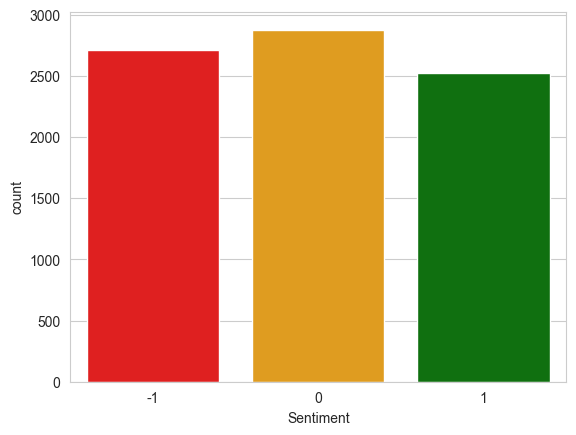

In [54]:
import seaborn as sns

sns.set_style("whitegrid")

pal = ['red', 'orange', 'green']

sns.countplot(x=df['Sentiment'],
              data=df,
              hue=df['Sentiment'],
              palette=pal,
              legend=False)

## ML
### Pre-procesamos los datos para el entrenamiento con herramientas de NLTK: Tokenización, stemming, quitamos los stop words

In [24]:
def process_phrase(phrase, lower_case = True, stem = True, stop_words = True):
    
    if lower_case:
        phrase = phrase.lower()
    words = word_tokenize(phrase)
    words = [w for w in words if len(w) > 2]
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    words = [word for word in words if word not in ['https', 'aap', 'user']]    
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words

df['Text'] = df['Text'].apply(lambda x:' '.join(process_phrase(x)))
df


,Text,Sentiment
1,movi return fea/g indic trade year awesom,1
2,afraid short amzn look like near-monopoli eboo...,1
3,mnta 12.00,1
4,21.37,1
5,pgnx 3.04,1
...,...,...
10632,london marketwatch share price end lower londo...,-1
10633,rinkuskiai beer sale fell 6.5 per cent 4.16 mi...,0
10634,oper profit fell eur 35.4 eur 68.8 2007 includ...,-1
10635,net sale paper segment decrea eur 221.6 second...,-1


### WordClouds positivos y negativos

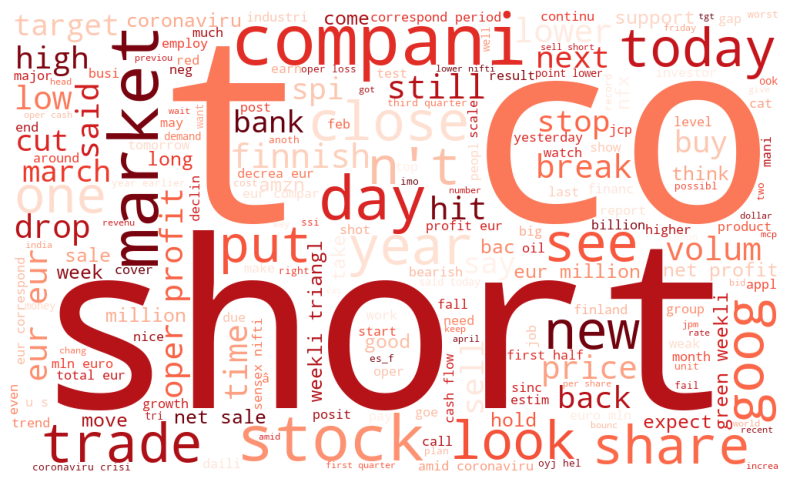

In [25]:
neg_str = ' '.join(list(df[df['Sentiment'] == -1]['Text']))
    
wordcloud_neg = WordCloud(width = 1000, height = 600, background_color="white", colormap='Reds').generate(neg_str)

plt.figure(figsize = (10, 6))
plt.imshow(wordcloud_neg)
plt.axis("off");

In [26]:
pd.Series(list(neg_str.split(sep=' '))).value_counts()

short       388
eur         325
profit      208
...         162
compani     144
           ... 
vss           1
otm           1
bingo.ca      1
vsb           1
10.5          1
Name: count, Length: 6346, dtype: int64

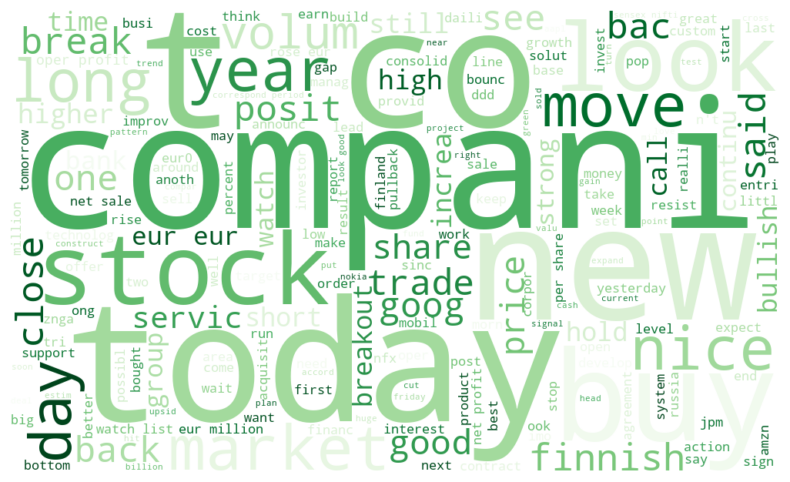

In [52]:
pos_str = ' '.join(list(df[df['Sentiment'] == 1]['Text']))
    
wordcloud_neg = WordCloud(width = 1000, height = 600, background_color="white", colormap='Greens').generate(pos_str)

plt.figure(figsize = (10, 6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off");

## MODELOS ENTRENADOS CON NUESTRO DATASET

Como la mayoría de algoritmos de machine learning necesitan datos numéricos y en este caso trabajamos con textos como única variable de entrada vamos a tener que aplicar un método eficiente de "traducir" este texto a un valor numérico.

Una de las herramientas utilizadas para ello es el __CountVectorizer__ de __sklearn__, que convierte texto en vectores de frecuencia de palabras. Internamente, lo hace separando primero las palabras (_tokenizar_), crea con ellas un vocabulario (diccionario de tokens), asigna un valor a cada token (equivalente a su posición en el vocabulario), y luego "traduce" el texto original a un vector de frecuencias que puede ser usado por los algorítmos de ML.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# from sklearn.metrics import classification_report
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import accuracy_score


#### Separamos en train-test y vectorizamos los textos

In [29]:
X = list(df['Text']) 
y = df['Sentiment']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
# Tokenizamos usando el CountVectorizer de sklearn que convierte texto en vectores de frecuencia de palabras
# ngram_range=(1,2) : hace que el CountVectorizer incluya en el vocabulario no solo palabras sueltas (1) si no que 
# también pares de palabras consecutivas (2) - interpreta un poco mejor los textos a nivel semántico  

cv = CountVectorizer(ngram_range=(1,2))

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

#### 1. Logistic Regression

In [32]:
log_reg = LogisticRegression(solver='liblinear', multi_class='auto')
log_reg.fit(X_train_cv, y_train)
y_pred = log_reg.predict(X_test_cv)

print('Logistic Regression Score:', round(log_reg.score(X_test_cv, y_test) * 100, 2), '%')

Logistic Regression Score: 76.52 %


In [34]:
print(X_test[20])

print(y_test.iloc[20])

y_pred[20]

bac two trade yesterday hold realli well trade high volum weak tape
1


1

#### 2. Random Forest Classifier con GridSearchCV

In [38]:
parameters = {'max_features': ['sqrt'],
             'n_estimators': [100, 500, 1000, 2000],
             'max_depth': [None, 1, 5, 10],
             'min_samples_split': [5, 10, 50],
             'min_samples_leaf': [1, 5, 20],
             'bootstrap': [True]}

# parameters = {'max_features': ['sqrt'],
#              'n_estimators': [500],
#              'max_depth': [None],
#              'min_samples_split': [10],
#              'min_samples_leaf': [1]}

rfc = RandomForestClassifier()
grid_search = GridSearchCV(rfc, parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train_cv, y_train)
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 500}

In [39]:
rfc.fit(X_train_cv, y_train)

RandomForestClassifier()

In [37]:
y_pred = rfc.predict(X_test_cv)

print('Random Forest Classifier score: ', round(accuracy_score (y_test, y_pred) * 100, 2), '%')

Random Forest Classifier score:  74.8 %


In [209]:
# X_test_REAL = test_df[['Tweet']][:100]
# print(X_test_REAL['Tweet'][50])

# X_test_REAL = cv.transform(X_test_REAL)

# y_pred_REAL = rfc.predict(X_test_REAL)
# print(y_pred[50])

### 3. REDES NEURONALES

#### Embedding layer

Vamos a utilizar otro método de vectorización de los textos - __GloVE Word Embedding (Global Vectors for Word Representation)__. Este método fue desarrollador por científicos de la Universidad de Stanford. Se basa también en las estadísticas de frencuencia de aparición de las palabras en un texto y mira también pares de palabras además de palabras sueltas.

Es un modelo pre-entrenado (en volúmenes grandes de texto, como Wikipedia o Common Crawl) y puede interpretar relaciones semánticas entre palabras.


In [270]:
import tensorflow as tf

from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Flatten, Dense, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from keras.preprocessing.sequence import pad_sequences

In [280]:
tokenizador = Tokenizer()

tokenizador.fit_on_texts(X_train)

X_train_glove = tokenizador.texts_to_sequences(X_train)
X_test_glove = tokenizador.texts_to_sequences(X_test)

In [281]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(tokenizador.word_index) + 1

vocab_length

15067

In [282]:
X_train_words = [x.split(sep=' ') for x in X_train]
X_train_lens = [len(x) for x in X_train_words]
max(X_train_lens)

62

In [283]:
# Padding all reviews to fixed length 100

maxlen = 100

X_train_glove = pad_sequences(X_train_glove, padding='post', maxlen=maxlen)
X_test_glove = pad_sequences(X_test_glove, padding='post', maxlen=maxlen)

In [284]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('./data/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in tokenizador.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

embedding_matrix.shape

(15067, 100)

### Test - probamos con la tokenizacion CountVectorizer

In [310]:
cv = CountVectorizer(ngram_range=(1,2))

X_train_cv2 = cv.fit_transform(X_train).toarray()
X_test_cv2 = cv.transform(X_test).toarray()

In [306]:
ffnn_model2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_cv2.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [307]:
ffnn_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [308]:
ffnn_model2.fit(X_train_cv2, y_train, epochs=10, batch_size=32, validation_data=(X_test_cv2, y_test))


Epoch 1/10
266/266 [==============================] - 30s 110ms/step - loss: -0.5704 - accuracy: 0.4008 - val_loss: -3.8817 - val_accuracy: 0.5028
Epoch 2/10
266/266 [==============================] - 24s 91ms/step - loss: -52.7154 - accuracy: 0.5330 - val_loss: -66.2648 - val_accuracy: 0.4131
Epoch 3/10
266/266 [==============================] - 23s 85ms/step - loss: -399.4798 - accuracy: 0.5433 - val_loss: -273.8755 - val_accuracy: 0.3947
Epoch 4/10
266/266 [==============================] - 24s 89ms/step - loss: -1360.3258 - accuracy: 0.5480 - val_loss: -716.1625 - val_accuracy: 0.3961
Epoch 5/10
266/266 [==============================] - 24s 90ms/step - loss: -3183.0481 - accuracy: 0.5553 - val_loss: -1400.5072 - val_accuracy: 0.3886
Epoch 6/10
266/266 [==============================] - 25s 93ms/step - loss: -6067.3647 - accuracy: 0.5545 - val_loss: -2419.8979 - val_accuracy: 0.3877
Epoch 7/10
266/266 [==============================] - 24s 92ms/step - loss: -10154.5674 - accuracy: 

In [309]:
loss, accuracy = ffnn_model2.evaluate(X_test_cv2, y_test)
print("Test Accuracy:", accuracy)

67/67 [==============================] - 1s 12ms/step - loss: -9435.3223 - accuracy: 0.3647
Test Accuracy: 0.36466166377067566


### Redes Neuronales : Feed-Forward NN

In [287]:
# Arquitectura

ffnn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

ffnn_model.add(embedding_layer)

ffnn_model.add(Flatten())
ffnn_model.add(Dense(1, activation='sigmoid'))

In [288]:
# Compiling & resúmen

ffnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(ffnn_model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          1506700   
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_4 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 1516701 (5.79 MB)
Trainable params: 10001 (39.07 KB)
Non-trainable params: 1506700 (5.75 MB)
_________________________________________________________________
None


In [289]:
# Entrenamiento

train_ffnn = ffnn_model.fit(X_train_glove, y_train, batch_size=128, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50


54/54 [==============================] - 1s 5ms/step - loss: 0.5361 - acc: 0.2785 - val_loss: 0.4978 - val_acc: 0.2756
Epoch 2/50
54/54 [==============================] - 0s 4ms/step - loss: 0.4154 - acc: 0.2853 - val_loss: 0.4584 - val_acc: 0.3008
Epoch 3/50
54/54 [==============================] - 0s 4ms/step - loss: 0.3432 - acc: 0.3010 - val_loss: 0.4394 - val_acc: 0.2955
Epoch 4/50
54/54 [==============================] - 0s 4ms/step - loss: 0.2760 - acc: 0.3238 - val_loss: 0.4236 - val_acc: 0.3020
Epoch 5/50
54/54 [==============================] - 0s 3ms/step - loss: 0.2237 - acc: 0.3292 - val_loss: 0.4079 - val_acc: 0.3261
Epoch 6/50
54/54 [==============================] - 0s 3ms/step - loss: 0.1741 - acc: 0.3505 - val_loss: 0.4008 - val_acc: 0.3167
Epoch 7/50
54/54 [==============================] - 0s 4ms/step - loss: 0.1262 - acc: 0.3460 - val_loss: 0.3955 - val_acc: 0.3249
Epoch 8/50
54/54 [==============================] - 0s 5ms/step - loss: 0.0802 - acc: 0.3654 - val_lo

In [290]:
# Predicciones & scoring

score = ffnn_model.evaluate(X_test_glove, y_test, verbose=1)

print('Feed-Forward NN accuracy score: ', round(score[1] * 100, 2), '%')

 1/67 [..............................] - ETA: 1s - loss: -0.1716 - acc: 0.3438

67/67 [==============================] - 0s 1ms/step - loss: 0.3092 - acc: 0.3661
Feed-Forward NN accuracy score:  36.61 %


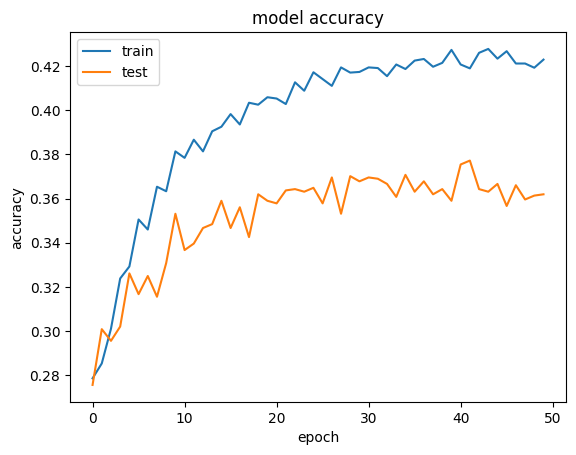

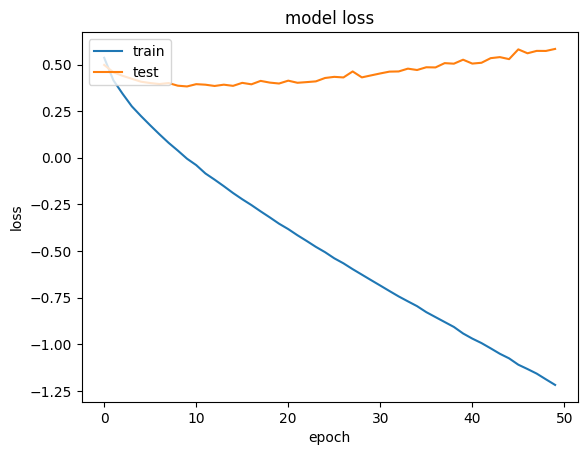

In [291]:
# Gráfico de entrenamiento y evaluación en test

plt.plot(train_ffnn.history['acc'])
plt.plot(train_ffnn.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(train_ffnn.history['loss'])
plt.plot(train_ffnn.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Redes Neuronales : CNN 1D

In [297]:
# Arquitectura

cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

In [298]:
# Compiling & resúmen

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          1506700   
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_2 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1570957 (5.99 MB)
Trainable params: 64257 (251.00 KB)
Non-trainable params: 1506700 (5.75 MB)
_________________________________________________________________
None


In [299]:
# Entrenamiento

train_cnn_model = cnn_model.fit(X_train_glove, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20


54/54 [==============================] - 2s 27ms/step - loss: 0.4363 - acc: 0.3025 - val_loss: 0.3608 - val_acc: 0.3020
Epoch 2/20
54/54 [==============================] - 1s 25ms/step - loss: 0.1131 - acc: 0.3338 - val_loss: 0.2110 - val_acc: 0.3402
Epoch 3/20
54/54 [==============================] - 1s 26ms/step - loss: -0.2048 - acc: 0.3737 - val_loss: 0.0538 - val_acc: 0.3572
Epoch 4/20
54/54 [==============================] - 1s 26ms/step - loss: -0.6330 - acc: 0.4041 - val_loss: -0.1264 - val_acc: 0.3625
Epoch 5/20
54/54 [==============================] - 1s 27ms/step - loss: -1.2040 - acc: 0.4134 - val_loss: -0.3531 - val_acc: 0.4142
Epoch 6/20
54/54 [==============================] - 1s 26ms/step - loss: -1.9128 - acc: 0.4203 - val_loss: -0.6511 - val_acc: 0.4054
Epoch 7/20
54/54 [==============================] - 1s 26ms/step - loss: -2.8020 - acc: 0.4279 - val_loss: -0.9929 - val_acc: 0.4160
Epoch 8/20
54/54 [==============================] - 1s 24ms/step - loss: -3.8350 - ac

In [300]:
score = cnn_model.evaluate(X_test_glove, y_test, verbose=1)

print('CNN accuracy score: ', round(score[1] * 100, 2), '%')

 1/67 [..............................] - ETA: 1s - loss: -36.3436 - acc: 0.2812

67/67 [==============================] - 0s 4ms/step - loss: -16.9271 - acc: 0.3712
CNN accuracy score:  37.12 %


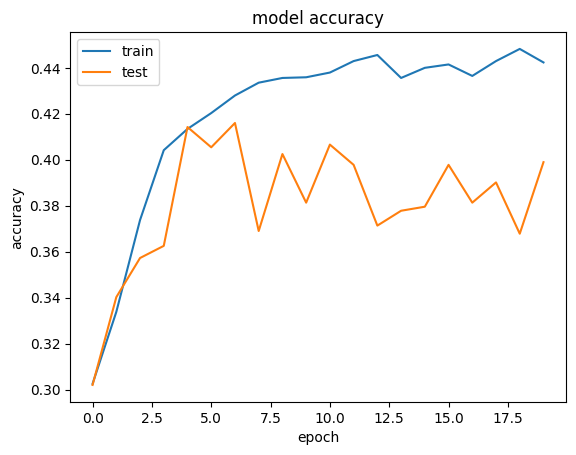

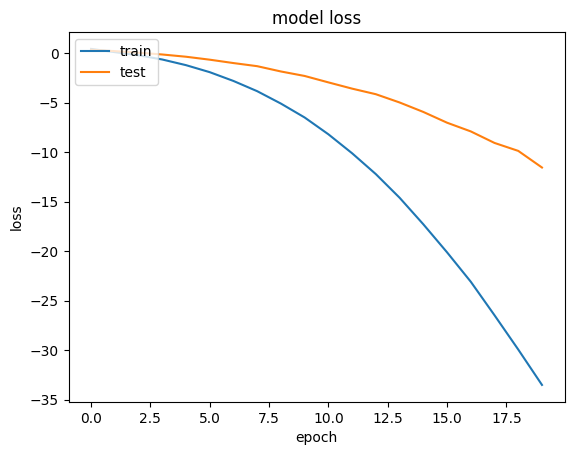

In [301]:
# Gráfico de entrenamiento y evaluación en test

plt.plot(train_cnn_model.history['acc'])
plt.plot(train_cnn_model.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(train_cnn_model.history['loss'])
plt.plot(train_cnn_model.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

### Redes Neuronales : LSTM

In [302]:
# Arquitectura 

lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

In [303]:
# Compiling & resúmen

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(lstm_model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          1506700   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1624077 (6.20 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 1506700 (5.75 MB)
_________________________________________________________________
None


In [304]:
# Entrenamiento

train_lstm_model = lstm_model.fit(X_train_glove, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20


54/54 [==============================] - 9s 142ms/step - loss: 0.5565 - acc: 0.2716 - val_loss: 0.5283 - val_acc: 0.2709
Epoch 2/20
54/54 [==============================] - 8s 142ms/step - loss: 0.5219 - acc: 0.2721 - val_loss: 0.5456 - val_acc: 0.2709
Epoch 3/20
54/54 [==============================] - 8s 143ms/step - loss: 0.5234 - acc: 0.2715 - val_loss: 0.5406 - val_acc: 0.2709
Epoch 4/20
54/54 [==============================] - 8s 144ms/step - loss: 0.5237 - acc: 0.2715 - val_loss: 0.5332 - val_acc: 0.2709
Epoch 5/20
54/54 [==============================] - 8s 144ms/step - loss: 0.5221 - acc: 0.2715 - val_loss: 0.5334 - val_acc: 0.2709
Epoch 6/20
54/54 [==============================] - 8s 144ms/step - loss: 0.5229 - acc: 0.2715 - val_loss: 0.5341 - val_acc: 0.2709
Epoch 7/20
54/54 [==============================] - 8s 144ms/step - loss: 0.5243 - acc: 0.2715 - val_loss: 0.5333 - val_acc: 0.2709
Epoch 8/20
54/54 [==============================] - 8s 145ms/step - loss: 0.5218 - acc:

In [268]:
# Predicciones & Scoring

score = lstm_model.evaluate(X_test_glove, y_test, verbose=1)

print('LSTM score: ', round(score[1] * 100, 2), '%')

67/67 [==============================] - 1s 18ms/step - loss: 0.5469 - acc: 0.2679
LSTM score:  26.79 %


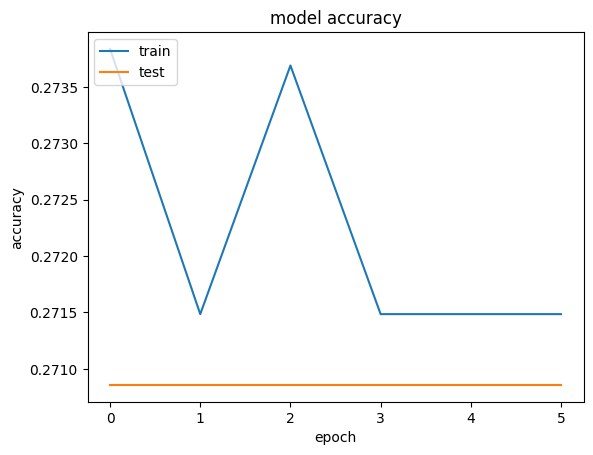

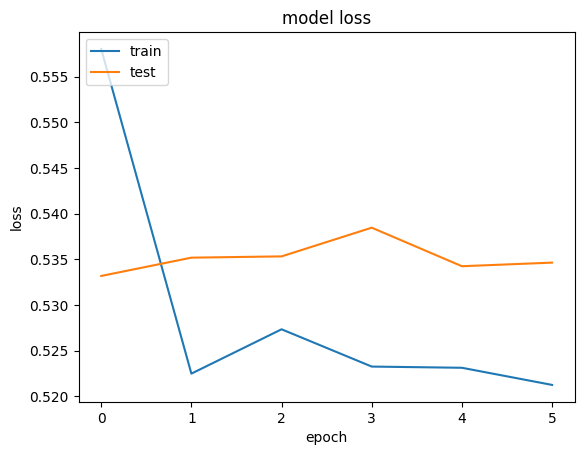

In [269]:
plt.plot(train_lstm_model.history['acc'])
plt.plot(train_lstm_model.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(train_lstm_model.history['loss'])
plt.plot(train_lstm_model.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## MODELOS PRE-ENTRENADOS

### 1. VADER (Valence Aware Dictionary and sEntiment Reasoner)

VADER es un modelo pre-entrenado de análisis de sentimientos. Se basa en léxicos y reglas y fue diseñado específicamente para analizar sentimientos expresados en texto de redes sociales. 

El SentimentIntensityAnalyzer() es una herramienta de VADER disponible en la biblioteca NLTK (Natural Language Toolkit) en Python.






In [158]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [211]:
# print(df['Text
# scores(df['Text'][50])

In [201]:
def net_score_vader(valor):
    if valor < 0:
        return -1
    elif valor > 0:
        return 1
    else:
        return 0

y_pred_vader = []

for i in range(len(X_test)):
    y_pred_vader.append(net_score_vader(sia.polarity_scores(X_test[i])['compound']))

print('VADER score: ', round(accuracy_score(y_test, y_pred_vader) * 100, 2), '%')

VADER score:  46.62 %


### 2. roBERTa

In [145]:
from transformers import pipeline

model = f"cardiffnlp/twitter-roberta-base-sentiment-latest"

sentiment_task = pipeline("sentiment-analysis", model=model)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [203]:
sentiment_map = {'negative': -1, 'positive': 1, 'neutral': 0}  

y_pred_roberta = [sentiment_task(i)[0]['label'] for i in X_test]

y_pred_roberta = [sentiment_map[senti] for senti in y_pred_roberta]

In [206]:
print('roBERTa score: ', round(accuracy_score(y_test, y_pred_roberta) * 100, 2), '%')

roBERTa score:  41.87 %


## Aplicamos el modelo con mejor resultados sobre el conjunto a predecir

El modelo que mejores resultados ha proporcionado ha sido la regresión logística.

El conjunto de test contiene unos 80.000 tweets del periodo septiembre 2021 - septiembre 2022 de las 25 más importantes (y seguidas) empresas de USA.

Vamos a comprobar si las predicciones proporcionadas por nuestro modelo sobre en el análisis de sentimiento de una empresa en concreto se corresponden de alguna manera con la evolución de las acciones de esa empresa en dicho período de tiempo.

### Miramos un poco el test set

In [57]:
test_df

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,"Mainstream media has done an amazing job at brainwashing people. Today at work, we were asked what companies we believe in &amp; I said @Tesla because they make the safest cars &amp; EVERYONE disagreed with me because they heard“they catch on fire &amp; the batteries cost 20k to replace”",TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k from the analysts. $tsla,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,"3/ Even if I include 63.0M unvested RSUs as of 6/30, additional equity needed for the RSUs is 63.0M x $54.20 = $3.4B. If the deal closed tomorrow at $54.20, Elon would need $2.0B for existing shares plus $3.4B for RSUs, so $5.4B new equity. $twtr $tsla",TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,"@RealDanODowd @WholeMarsBlog @Tesla Hahaha why are you still trying to stop Tesla FSD bro! Get your shit together and make something better? Thats how companies work, they competed. Crying big old ass fart clown!",TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids, you sad deranged old man",TSLA,"Tesla, Inc."
...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the market. Mix of #Fintech #Adtech and #EV. \n$UPST $XPEV $APPS $LI $Z https://t.co/ETBO02tD7U,XPEV,XPeng Inc.
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick snapshot of some of the largest increases in consensus topline estimates over the last 30 days for tech growth stocks. $STEM $BILL $XPEV $TRMR $OPEN $MNDY $S $AMKR $ASAN $FTCH https://t.co/yk43Ulf580",XPEV,XPeng Inc.
80790,2021-10-01 04:43:41+00:00,"Our record delivery results are a testimony of our unwavering pursuit of safety, quality, and customer experience. Details of Sep delivery results here: https://t.co/UbZCyRZvRZ. $XPEV #ElectricVehicles https://t.co/1nTbrL03no",XPEV,XPeng Inc.
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, reaching the milestone of 10,000-unit monthly deliveries. We believe that technology will reshape our future mobility, and we put effort into making it happen. $XPEV\n#SmartMobility #ElectricCars #GoElectric #ElectricVehicles https://t.co/bTmYqbGTXQ",XPEV,XPeng Inc.


In [58]:
test_df.groupby('Stock Name').count()

,Date,Tweet,Company Name
Stock Name,,,
AAPL,5056,5056,5056
AMD,2227,2227,2227
AMZN,4089,4089,4089
BA,399,399,399
BX,50,50,50
COST,393,393,393
CRM,233,233,233
DIS,635,635,635
ENPH,216,216,216


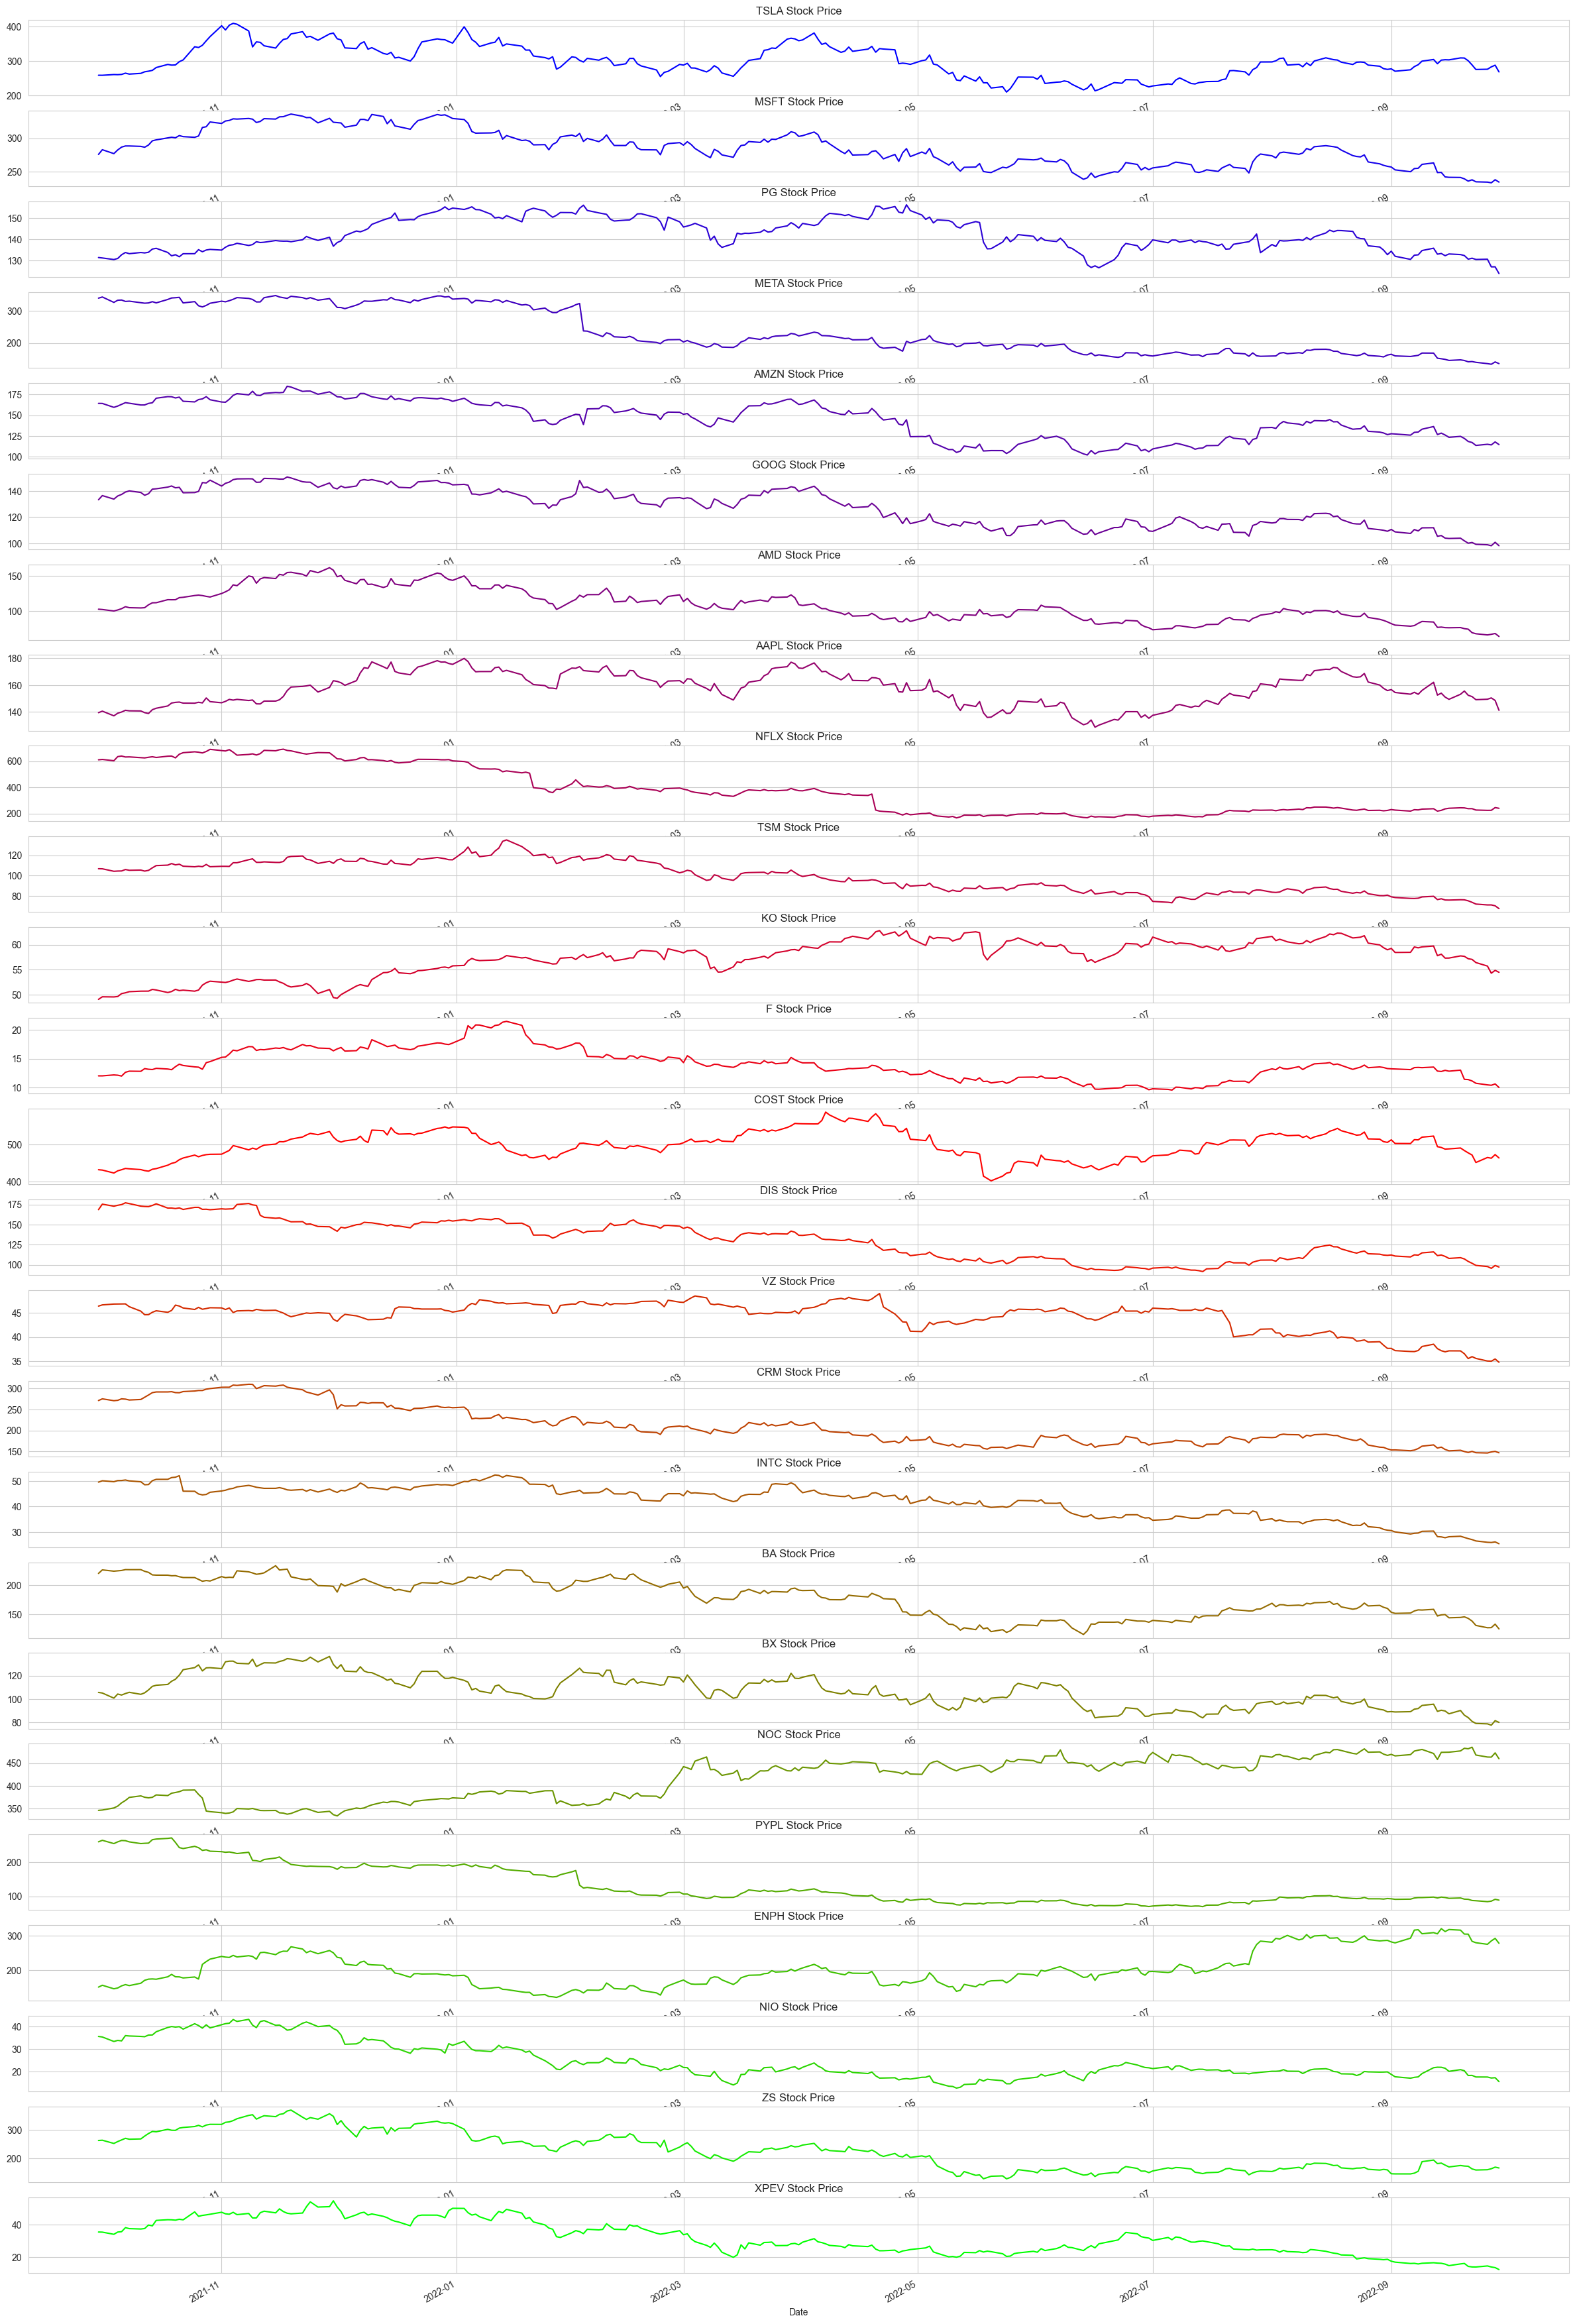

In [59]:
stock_list = list(test_df['Stock Name'].unique())

no_stocks = len(stock_list)
fig, ax = plt.subplots(no_stocks, 1, figsize = (30, 50))

colors = [cm.brg(x) for x in np.linspace(0, 1, 25)]

for i, stock in enumerate(stock_list):
    s = yf.Ticker(stock).history(start="2021-09-30", end="2022-09-30")
    s["Close"].plot(title=stock + " Stock Price", ax=ax[i], color=colors[i])

Vamos a analizar el caso de META, cuyas acciones disminuyeron en valor entre septiembre 2021 y septiembre 2022.

In [69]:
# Predicciones sobre los tweets de META

X_test_META = test_df[test_df['Stock Name'] == 'META']

X_test_META_cv = cv.transform(list(X_test_META['Tweet']))
y_test_META = log_reg.predict(X_test_META_cv)

X_META = X_test_META.copy()
X_META['Sentiment'] = y_test_META

X_META

,Date,Tweet,Stock Name,Company Name,Sentiment
45600,2022-09-29 19:07:54+00:00,"*META ANNOUNCES HIRING FREEZE, WARNS EMPLOYEES OF RESTRUCTURING\n\n$META $FB https://t.co/7ndrg7yUjL",META,"Meta Platforms, Inc.",-1
45601,2022-09-25 14:34:16+00:00,Year-to-Date Performance:\n\n1. $FB: -59%\n2. $AAPL: -17%\n3. $AMZN: -33%\n4. $NFLX: -62%\n5. $GOOGL: -32%\n6. $TSLA: -31%\n7. $MSFT: -29%\n8. $DIS: -36%\n9. $NVDA: -58%\n10. $BABA: -35%\n11. $PYPL: -55%\n\nImagine the damage once housing prices crash next.\n\nThe bubble is officially bursting.,META,"Meta Platforms, Inc.",1
45602,2022-09-22 21:51:28+00:00,"Year-to-Date performance:\n\n1. $FB: -58%\n2. $AMZN: -31%\n3. $AAPL: -16%\n4. $NFLX: -60%\n5. $GOOGL: -31%\n6. $MSFT: -28%\n7. $TSLA: -28%\n8. $F: -41%\n9. $PYPL: -55%\n\nAll FAANG stocks, aside from $AAPL, are now in bear market territory.\n\nThe fact that $SPX isn’t down 30%+ is a miracle.",META,"Meta Platforms, Inc.",1
45603,2022-09-22 16:18:00+00:00,$EPAZ DeskFlex Metaverse Office Technology offers businesses an exciting way to merge the current environment of remote and in-person workplaces. #Meta $FB $MSFT $MTTR $ADBE $NVDA $U https://t.co/XiiqiLPP02,META,"Meta Platforms, Inc.",-1
45604,2022-09-22 07:15:57+00:00,⚠️BREAKING:\n\n*META STOCK CRASHES TO LOWEST LEVEL SINCE MARCH 2020\n\n$META $FB https://t.co/FpCpfpYPLH,META,"Meta Platforms, Inc.",-1
...,...,...,...,...,...
48346,2021-10-01 00:18:05+00:00,Friday Lotto IDEAS 💡🎲\n\n✅Break above 789: $TSLA 795 calls.\n✅Break above 39.6: $AMC 40 calls.\n✅Break below 269: $BNTX 265 puts.\n✅Break below 338: $FB 335 puts.,META,"Meta Platforms, Inc.",1
48347,2021-10-01 00:01:55+00:00,$FB\n\n“Facebook has compounded earnings at &gt;50% for a decade and projected to grow at &gt;30% for next 3 years. \n\nYou are paying a below market multiple for a compounder with sizeable growth”,META,"Meta Platforms, Inc.",1
48348,2021-09-30 23:47:15+00:00,"Setups I like for a bounce:\n\n$ROKU &gt; 317 can see 328, 344\n\n$CRWD &gt; 251 can see 258, 265\n\nSetups I like if we head lower:\n\n$FB &lt; 337 can see 334, 332, 328\n\n$SHOP &lt; 1341 can see 1321, 1300 https://t.co/gqJBEK0sSg",META,"Meta Platforms, Inc.",-1
48349,2021-09-30 14:31:54+00:00,Gartner’s 5 Technologies expected to gain the most value: \n\n$TWLO $DDOG $SNOW $MDB $PLTR $NVDA $MSFT $FB $NET $CRWD https://t.co/oAGv8qPhGb,META,"Meta Platforms, Inc.",-1


<Axes: xlabel='Date_mean'>

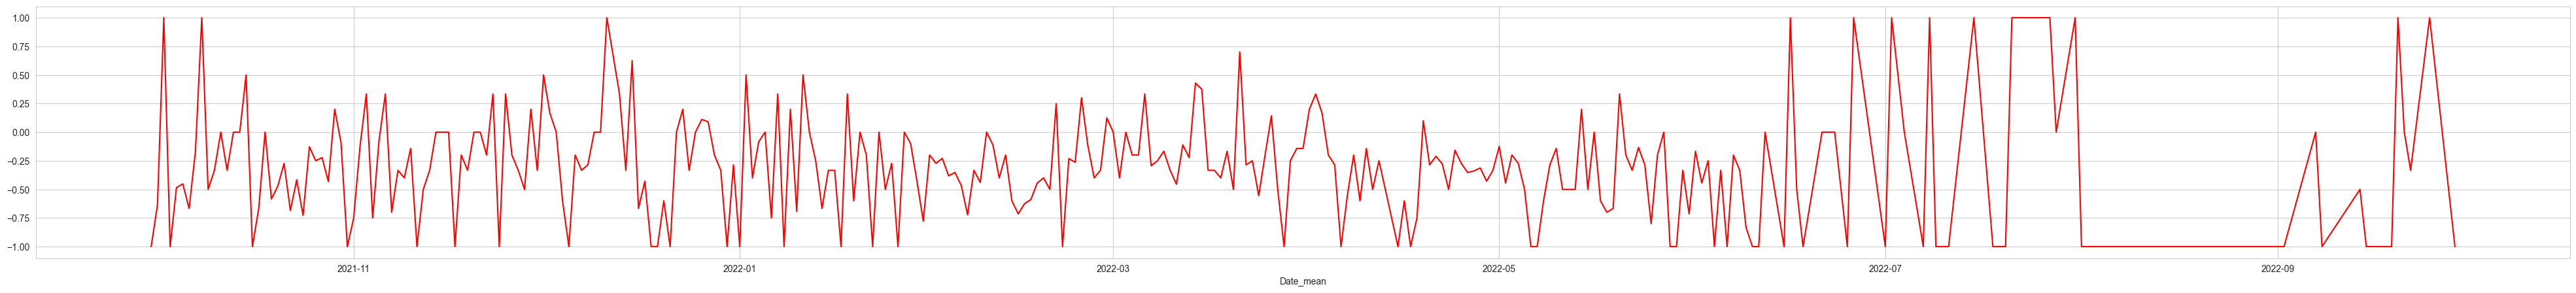

In [73]:
# Gráfico del sentimiento durante el año analizado

import datetime as dt

X_META["Date"] = pd.to_datetime(X_META['Date'])
X_META["Date_mean"] = X_META['Date'].dt.date

X_META_daily = X_META.groupby("Date_mean")["Sentiment"].mean()

plt.figure(figsize = (50, 5))
X_META_daily.plot(color='red')



<Axes: xlabel='Date_mean'>

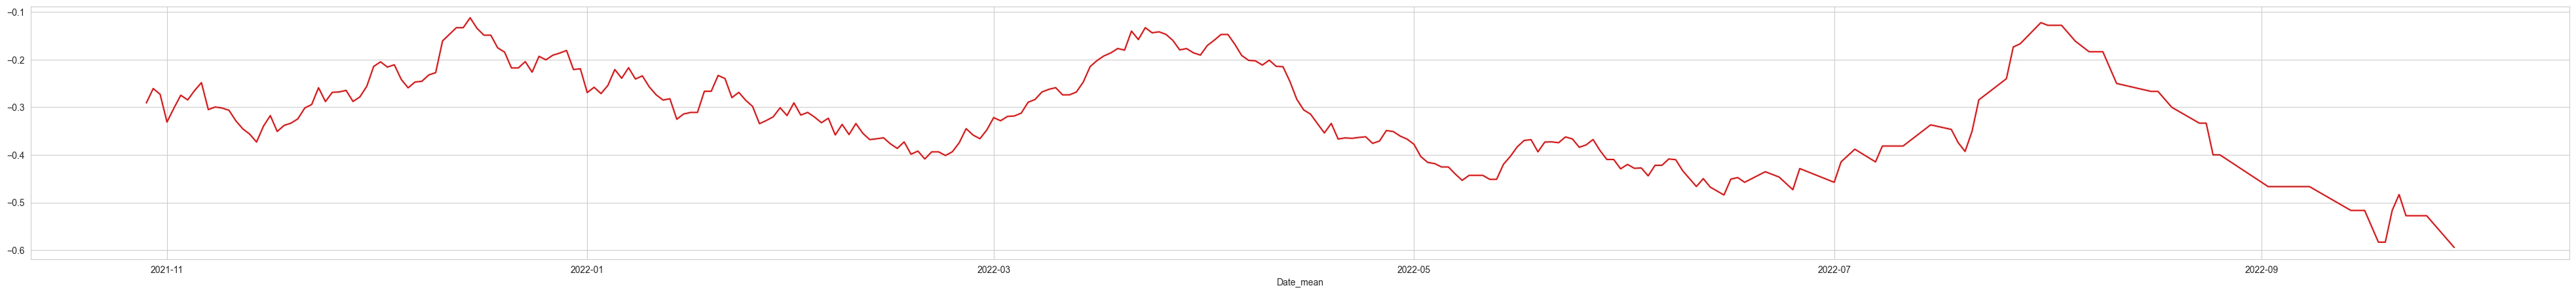

In [74]:
# Suavizamos un poco el gráfico

X_META_daily_suave = X_META_daily.rolling(window=30).mean()

plt.figure(figsize = (50, 5))
X_META_daily_suave.plot(color='red')

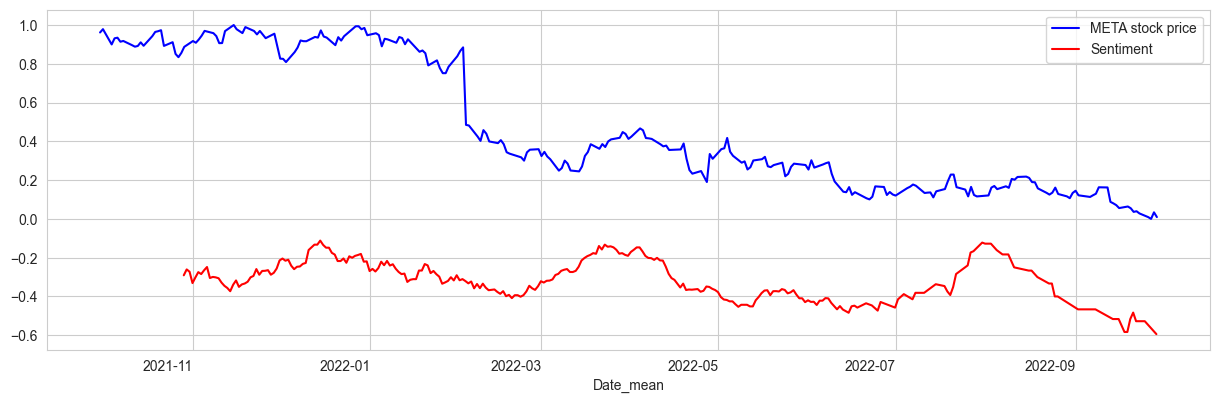

In [75]:
# Comparamos con el valor de la accion
# Escalamos los datos para poder compararlos en el mismo gráfico

plt.figure(figsize = (15, 5))

s = yf.Ticker('META').history(start="2021-09-30", end="2022-09-30")
s_price = s[['Close']]
mm = MinMaxScaler()
s_price = mm.fit_transform(s_price)
s_price
s['Close'] = s_price
s
s['Close'].plot(color='blue', label='META stock price')
X_META_daily_suave.plot(color='red')

plt.legend()